In [1]:
from pathlib import Path
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
source_1_file = Path("excel_files\source_1.xlsx")
source_2_file = Path("excel_files\source_2.xlsx")

source_1_df = pd.read_excel(source_1_file, header=None)
source_2_df = pd.read_excel(source_2_file, header=None)

In [4]:
column_names = [f'DP-{i}' for i in range(1, 3401)]

source_1_df = source_1_df.drop(source_1_df.columns[:6], axis=1)
source_1_df.columns = column_names
source_1_df['source'] = 0 # 0 for source 1

source_2_df = source_2_df.drop(source_2_df.columns[:6], axis=1)
source_2_df.columns = column_names
source_2_df['source'] = 1 # 1 for source 2

dataframe = pd.concat([source_1_df, source_2_df], axis=0)
dataframe = dataframe.reset_index(drop=True)
dataframe.to_excel('excel_files\dataframe.xlsx', index=False)

In [5]:
# Build the CNN model
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(3400, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(64, activation='relu'))

# Output layer for binary classification
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3396, 64)          384       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1698, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1694, 128)         41088     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 847, 128)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 843, 256)          164096    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 421, 256)         0

1D Convolutional Neural Network (CNN) model using TensorFlow's Keras API, designed for binary classification tasks. Here's a breakdown of the model:

1. Model Structure:
Sequential API: The model is constructed using the Sequential class, which allows stacking layers linearly, from input to output.
2. Convolutional Layers:
First Conv1D Layer: The model begins with a 1D Convolutional layer (Conv1D) that applies 64 filters of size 5 across the input data. This layer extracts features from the input data of shape (3400, 1) (which could be a time series or sequential data with 3400 steps and 1 feature per step). The ReLU activation function introduces non-linearity.

MaxPooling1D: Following the convolution, a Max Pooling layer reduces the dimensionality by taking the maximum value from each pool of size 2. This helps in reducing the computational cost and controlling overfitting.

Second Conv1D Layer: Another Conv1D layer with 128 filters and a kernel size of 5 is added, followed by a Max Pooling layer. This layer captures more complex patterns.

Third Conv1D Layer: A third Conv1D layer with 256 filters is used, followed by Max Pooling. This layer captures even deeper features.

3. Flattening Layer:
After the convolutional layers, a Flatten layer converts the 3D tensor (resulting from the convolutional layers) into a 1D vector, making it suitable for fully connected layers.
4. Fully Connected Layers:
Dense Layer 1: A dense (fully connected) layer with 128 neurons and ReLU activation is added. This layer interprets the features extracted by the convolutional layers.
Dropout Layer: A dropout layer with a rate of 0.5 is added to reduce overfitting by randomly setting half of the input units to zero during training.
Dense Layer 2: Another dense layer with 64 neurons and ReLU activation is added to further refine the learned features.
5. Output Layer:
Dense Layer (Output): The final layer is a dense layer with 1 neuron and a sigmoid activation function, suitable for binary classification. The sigmoid function outputs a probability value between 0 and 1.
6. Compilation:
The model is compiled with the Adam optimizer (learning rate set to 0.0001), using binary cross-entropy as the loss function (suitable for binary classification tasks), and accuracy as the performance metric.
7. Model Summary:
The cnn_model.summary() function call outputs a summary of the model architecture, including the number of parameters in each layer and the overall structure.

In [6]:
Y = dataframe['source'].to_numpy()
X = dataframe.drop(columns=['source']).to_numpy()
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Reshape the data for the CNN
X_train = X_train.reshape(X_train.shape[0], 3400, 1)
X_test = X_test.reshape(X_test.shape[0], 3400, 1)

Epoch 1/20
4/4 [==============================] - 4s 575ms/step - loss: 0.6723 - accuracy: 0.5357 - val_loss: 0.6570 - val_accuracy: 0.3571
Epoch 2/20
4/4 [==============================] - 2s 473ms/step - loss: 0.6099 - accuracy: 0.5357 - val_loss: 0.6170 - val_accuracy: 0.4286
Epoch 3/20
4/4 [==============================] - 2s 443ms/step - loss: 0.5286 - accuracy: 0.5714 - val_loss: 0.5735 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 2s 424ms/step - loss: 0.4600 - accuracy: 0.7143 - val_loss: 0.5268 - val_accuracy: 0.6429
Epoch 5/20
4/4 [==============================] - 2s 424ms/step - loss: 0.4103 - accuracy: 0.8036 - val_loss: 0.4717 - val_accuracy: 0.7857
Epoch 6/20
4/4 [==============================] - 2s 441ms/step - loss: 0.3488 - accuracy: 0.8929 - val_loss: 0.3776 - val_accuracy: 0.8571
Epoch 7/20
4/4 [==============================] - 2s 545ms/step - loss: 0.3021 - accuracy: 0.9286 - val_loss: 0.2609 - val_accuracy: 0.9286
Epoch 8/20
4/4 [====

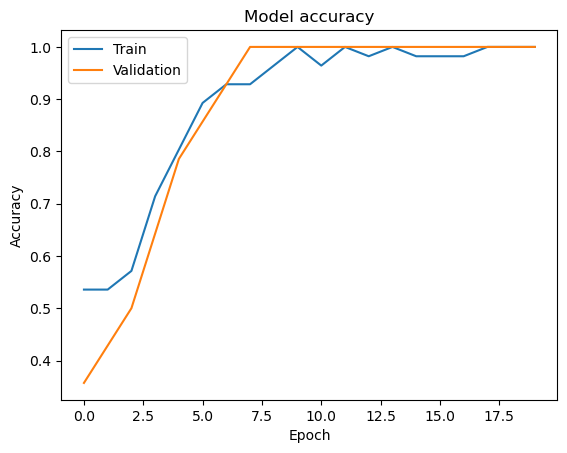

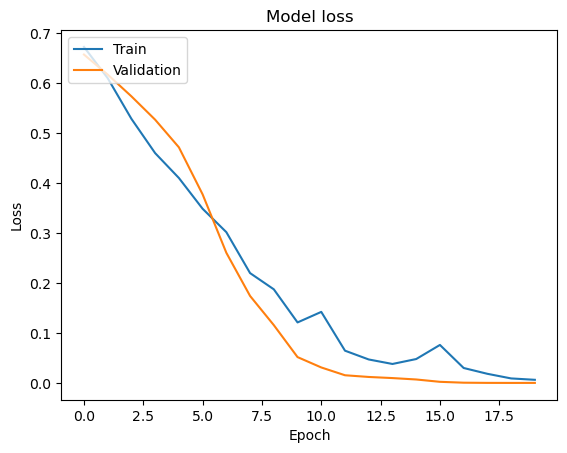

In [7]:
# Train the model
history = cnn_model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [8]:
# Save the model to a file
# cnn_model.save('nn_models\source_classification_using_cnn.h5')

In [9]:
# Build the DNN model
dnn_model = Sequential()

# Flatten the input signal
dnn_model.add(Flatten(input_shape=(3400, 1)))

# First fully connected layer
dnn_model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.4))

# Second fully connected layer
dnn_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.4))

# Third fully connected layer
dnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.3))

# Fourth fully connected layer
dnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.3))

# Output layer for binary classification
dnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
dnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy', metrics=['accuracy'])

1. Input Layer and Flattening:
Flatten(input_shape=(3400, 1)):
The input layer takes in a 1D signal with 3400 time steps and 1 feature per step.
The Flatten layer converts the 2D input (3400, 1) into a 1D vector of length 3400. This transformation is necessary to connect the input data to the dense layers.
2. Fully Connected Layers (Dense Layers):
The dense layers form the core of the model, capturing patterns and relationships in the data.

First Dense Layer:

Dense(512, activation='relu', kernel_regularizer=l2(0.001)):
This layer has 512 neurons, which gives the model the capacity to learn more complex patterns. The ReLU (Rectified Linear Unit) activation function introduces non-linearity, allowing the model to capture non-linear relationships in the data.
L2 regularization (kernel_regularizer=l2(0.001)) penalizes large weights during training, helping to reduce overfitting. The regularization term is added to the loss function, discouraging the model from relying too heavily on any single feature.
BatchNormalization():
Batch normalization normalizes the inputs to this layer across the batch, stabilizing and speeding up the training process. It helps mitigate the internal covariate shift (i.e., changes in the distribution of layer inputs), which can improve generalization and reduce sensitivity to weight initialization.
Dropout(0.4):
Dropout randomly sets 40% of the neurons to zero during training, preventing the model from overfitting by ensuring it doesn't rely too heavily on any particular neuron.
Second Dense Layer:

Dense(256, activation='relu', kernel_regularizer=l2(0.001)):
This layer has 256 neurons, and it continues to extract features from the data. The L2 regularization and ReLU activation functions are applied here as well.
BatchNormalization() and Dropout(0.4) are used to improve training stability and reduce overfitting.
Third Dense Layer:

Dense(128, activation='relu', kernel_regularizer=l2(0.001)):
With 128 neurons, this layer reduces the dimensionality of the feature space while retaining important information. The same techniques (ReLU, L2 regularization, batch normalization, and dropout) are applied.
Dropout(0.3): The dropout rate is slightly reduced here, as the model begins to refine its understanding of the data.
Fourth Dense Layer:

Dense(64, activation='relu', kernel_regularizer=l2(0.001)):
This layer with 64 neurons further refines the features extracted from the input data. The ReLU activation and L2 regularization are applied, along with batch normalization and a dropout rate of 30%.
3. Output Layer:
Dense(1, activation='sigmoid'):
The output layer consists of a single neuron with a sigmoid activation function. The sigmoid function maps the output to a value between 0 and 1, which is perfect for binary classification tasks (e.g., classifying the signal as belonging to one of two classes).
4. Model Compilation:
Optimizer: The model is compiled with the Adam optimizer, which is an adaptive learning rate optimization algorithm that is widely used in deep learning due to its efficiency and effectiveness.
Learning Rate: The learning rate is set to 0.0001, a small value that allows the model to learn gradually and avoid large oscillations during training.
Loss Function: The binary cross-entropy loss function is used, which is appropriate for binary classification tasks. It measures the difference between the predicted probabilities and the actual labels.
Metrics: The model's performance is evaluated using the accuracy metric.
5. Early Stopping:
EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True):
Early stopping is a technique that monitors the validation loss during training. If the validation loss stops improving for 5 consecutive epochs (i.e., no improvement within the patience period), the training process is halted.
Additionally, restore_best_weights=True ensures that the model's weights are rolled back to the state where validation loss was the lowest, preventing overfitting.

Epoch 1/20
4/4 [==============================] - 3s 142ms/step - loss: 2.2023 - accuracy: 0.6607 - val_loss: 2.1585 - val_accuracy: 0.8571
Epoch 2/20
4/4 [==============================] - 0s 43ms/step - loss: 1.9280 - accuracy: 0.7857 - val_loss: 2.1400 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 0s 50ms/step - loss: 2.0011 - accuracy: 0.8036 - val_loss: 2.1197 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 50ms/step - loss: 1.8574 - accuracy: 0.8214 - val_loss: 2.1028 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 46ms/step - loss: 1.7026 - accuracy: 0.9286 - val_loss: 2.0839 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 53ms/step - loss: 1.7352 - accuracy: 0.9286 - val_loss: 2.0720 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 45ms/step - loss: 1.7436 - accuracy: 0.8750 - val_loss: 2.0543 - val_accuracy: 1.0000
Epoch 8/20
4/4 [==========

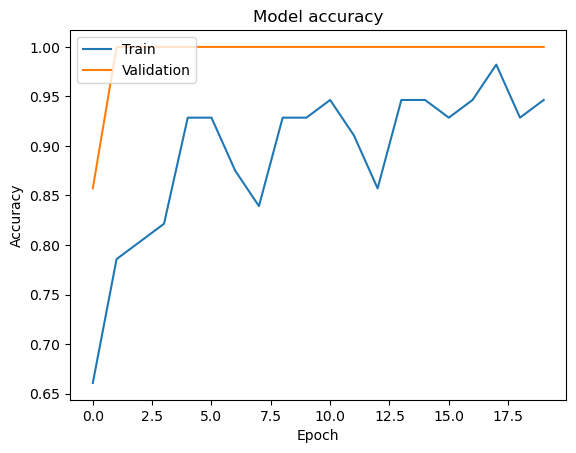

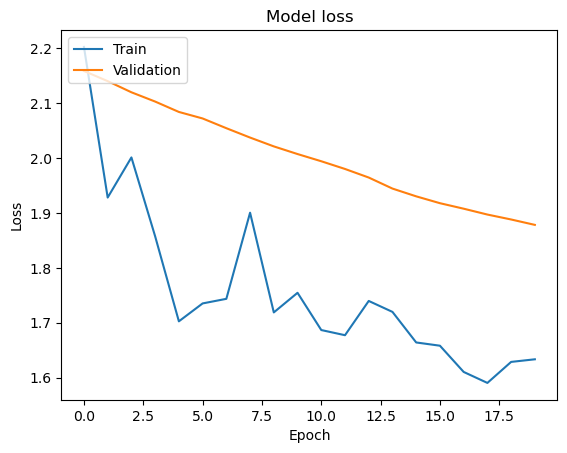

In [10]:
# Train the model
history = dnn_model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = dnn_model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
# Testing on Excel File
def test_excel_file(test_file, model):
    test_df = pd.read_excel(test_file, header=None)
    total_rows = test_df.shape[0]
    total_columns = test_df.shape[1]
    signal_columns = 3400
    
    test_df = test_df.drop(test_df.columns[:6], axis=1)
    
    for counter in range(total_rows):
        sample = test_df.iloc[counter].to_numpy()
        # Reshape the sample to match the input shape of the model
        sample_reshaped = sample.reshape(1, 3400, 1)
        # Predict the class (returns a probability)
        prediction = cnn_model.predict(sample_reshaped)
        if prediction > 0.5:
            source = 1
        else:
            source = 0
        print(f'Predicted Source {source}')

In [12]:
test_file = Path(r"D:\Study\CI\ComputationalIntelligence\excel_files\test_file.xlsx")
test_excel_file(test_file, cnn_model)

1/1 [==============================] - 0s 166ms/step
Predicted Source 0
1/1 [==============================] - 0s 33ms/step
Predicted Source 1
1/1 [==============================] - 0s 40ms/step
Predicted Source 0
1/1 [==============================] - 0s 39ms/step
Predicted Source 1
1/1 [==============================] - 0s 47ms/step
Predicted Source 0
1/1 [==============================] - 0s 40ms/step
Predicted Source 1
1/1 [==============================] - 0s 41ms/step
Predicted Source 0
1/1 [==============================] - 0s 36ms/step
Predicted Source 1
1/1 [==============================] - 0s 41ms/step
Predicted Source 0
1/1 [==============================] - 0s 36ms/step
Predicted Source 1


In [13]:
test_file = Path(r"D:\Study\CI\ComputationalIntelligence\excel_files\test_file.xlsx")
test_excel_file(test_file, dnn_model)

1/1 [==============================] - 0s 35ms/step
Predicted Source 0
1/1 [==============================] - 0s 33ms/step
Predicted Source 1
1/1 [==============================] - 0s 36ms/step
Predicted Source 0
1/1 [==============================] - 0s 37ms/step
Predicted Source 1
1/1 [==============================] - 0s 38ms/step
Predicted Source 0
1/1 [==============================] - 0s 35ms/step
Predicted Source 1
1/1 [==============================] - 0s 38ms/step
Predicted Source 0
1/1 [==============================] - 0s 37ms/step
Predicted Source 1
1/1 [==============================] - 0s 35ms/step
Predicted Source 0
1/1 [==============================] - 0s 44ms/step
Predicted Source 1
